In [1]:
def load_fer2013(path='fer2013.csv'):
    import pandas as pd
    fer_data = pd.read_csv(path)
    fer_data['emotion_type'] = fer_data['emotion']
    fer_data = fer_data.replace(0, 'Angry')
    fer_data = fer_data.replace(1, 'Disgust')
    fer_data = fer_data.replace(2, 'Fear')
    fer_data = fer_data.replace(3, 'Happy')
    fer_data = fer_data.replace(4, 'Sad')
    fer_data = fer_data.replace(5, 'Surprise')
    fer_data = fer_data.replace(6, 'Neutral')
    fer_data = fer_data.drop('emotion', axis = 1)
    train_data = fer_data[fer_data['Usage']=='Training'].reset_index(drop=True)
    publictest_data = fer_data[fer_data['Usage']=='PublicTest'].reset_index(drop=True)
    privatetest_data = fer_data[fer_data['Usage']=='PrivateTest'].reset_index(drop=True)
    
    return train_data, publictest_data, privatetest_data

from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/Data/fer2013.csv'

train_data, publictest_data, privatetest_data = load_fer2013(path=path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


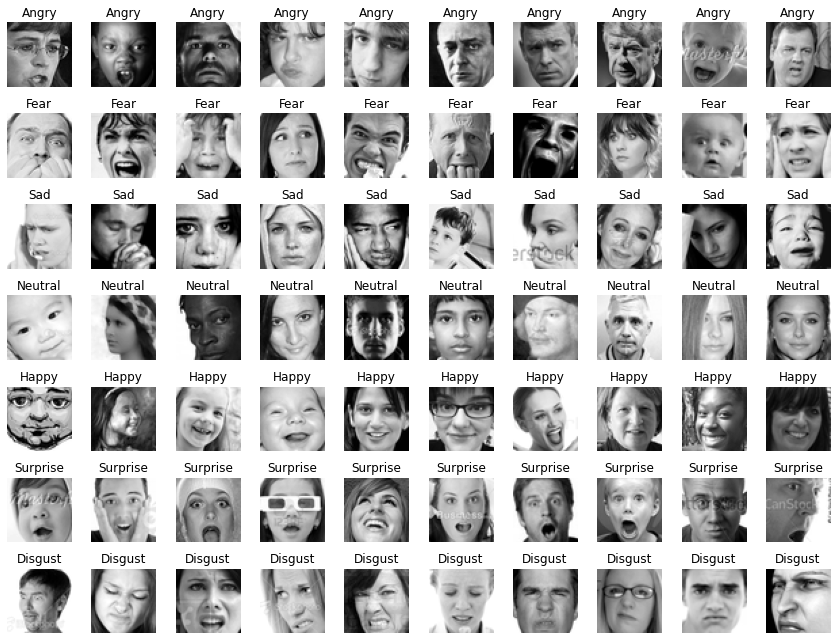

In [2]:
def plot_faces(data, images_per_row=10, size = 48):
    import matplotlib.pyplot as plt
    import numpy as np
    # set figure size
    plt.figure(figsize=(12,9))
    n_rows = len(data['emotion_type'].unique())
    
    loc = 0
    for category in data['emotion_type'].unique():
        # sample K images for each category
        images = data[data['emotion_type']==category].sample(images_per_row)
        
        for i in range(images_per_row):
            some_pixel = np.array(images.iloc[i]['pixels'].split()).astype('float32') # select one image sample
            some_image = some_pixel.reshape(size, size) # reshape from rank-1 tensor (2304,) to rank-2 tensor (48,48) 
            
            # put image in subplots
            loc += 1
            ax = plt.subplot(n_rows, images_per_row, loc)
            
            ax.imshow(some_image, cmap='gray')
            ax.axis("off")
            ax.set_title(images.iloc[i]['emotion_type'])
        plt.tight_layout()
    plt.axis("off")

plot_faces(train_data, images_per_row=10, size = 48)

In [137]:
# Build a simple KNN algorithm for classification. This method will be a basic algorithm to be compared with other machine learning 
# algorithms in the final project. The results could be not satisfactory using KNN algorithms. '

### (1) calculate distance between test feature and each of training data points


from scipy import spatial,stats

def KNN_predict_labels(train_features, train_labels, test_feature, K):
  label_record = []
  for i in range(len(train_features)):
    train_point_feature = train_features[i].astype(int)
    test_point_feature = test_feature

    #print(train_point_feature.shape)
    #print(test_point_feature.shape)

    # get distance for data point i 
    dis = spatial.distance.euclidean(train_point_feature, test_point_feature)
    
    # collect lable for datapoint i 

    y = train_labels[i]
    
    label_record.append((dis, y))

  # sort data points by distance 
  from operator import itemgetter
  sorted_labels = sorted(label_record,key=itemgetter(0))
  # get major class from top K neighbors 
  major_class = []

  #print(sorted_labels)
  for k in range(K):
    major_class.append(sorted_labels[k][1])

  # return the prediction using majority of class
  final_prediction = stats.mode(major_class).mode[0]
  #print("Prediction: ",final_prediction)
  return final_prediction



In [4]:
train_features = train_data["pixels"].str.split(expand=True)
train_labels = train_data["emotion_type"]

validation_features = privatetest_data["pixels"].str.split(expand=True)
validation_labels = privatetest_data["emotion_type"]

test_features = publictest_data["pixels"].str.split(expand=True)
test_labels = publictest_data["emotion_type"]

test_features

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,254,254,254,254,254,249,255,160,2,58,...,90,92,99,84,22,0,0,42,129,180
1,156,184,198,202,204,207,210,212,213,214,...,201,199,197,193,188,184,180,172,167,161
2,69,118,61,60,96,121,103,87,103,88,...,93,93,92,90,92,93,92,88,87,90
3,205,203,236,157,83,158,120,116,94,86,...,207,211,213,206,196,181,112,43,82,86
4,87,79,74,66,74,96,77,80,80,84,...,33,32,33,35,38,40,45,41,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,178,176,172,173,173,174,176,173,166,166,...,13,19,24,32,32,22,15,14,15,19
3585,25,34,42,44,42,47,57,59,59,58,...,70,67,70,92,80,74,33,9,12,11
3586,255,255,255,255,255,255,255,255,255,255,...,42,43,44,45,46,47,48,48,50,46
3587,33,25,31,36,36,42,69,103,132,163,...,12,11,9,8,6,4,4,4,5,4


In [9]:
train_labels

0          Angry
1          Angry
2           Fear
3            Sad
4        Neutral
          ...   
28704       Fear
28705      Angry
28706        Sad
28707      Angry
28708        Sad
Name: emotion_type, Length: 28709, dtype: object

In [70]:
test_features

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,254,254,254,254,254,249,255,160,2,58,...,90,92,99,84,22,0,0,42,129,180
1,156,184,198,202,204,207,210,212,213,214,...,201,199,197,193,188,184,180,172,167,161
2,69,118,61,60,96,121,103,87,103,88,...,93,93,92,90,92,93,92,88,87,90
3,205,203,236,157,83,158,120,116,94,86,...,207,211,213,206,196,181,112,43,82,86
4,87,79,74,66,74,96,77,80,80,84,...,33,32,33,35,38,40,45,41,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,178,176,172,173,173,174,176,173,166,166,...,13,19,24,32,32,22,15,14,15,19
3585,25,34,42,44,42,47,57,59,59,58,...,70,67,70,92,80,74,33,9,12,11
3586,255,255,255,255,255,255,255,255,255,255,...,42,43,44,45,46,47,48,48,50,46
3587,33,25,31,36,36,42,69,103,132,163,...,12,11,9,8,6,4,4,4,5,4


In [94]:
type(test_features)
test_features.iloc[0:2]
# for x in range(0,2):
#   tf = test_features[2303]
#   tf.shape

# tf

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,254,254,254,254,254,249,255,160,2,58,...,90,92,99,84,22,0,0,42,129,180
1,156,184,198,202,204,207,210,212,213,214,...,201,199,197,193,188,184,180,172,167,161


In [138]:
y_pred= []

train_features_np = train_features.to_numpy()
test_features_np = test_features.to_numpy()

# train_features_flat = train_features_np.flatten()
# test_feat

for i in range(0,20): # just use first 20 test points as example
  test_feature = test_features_np[i].astype(int)
  
  # print(test_feature)
  # break
  y_pred_each = KNN_predict_labels(train_features_np, train_labels, test_feature, K=3)
  y_pred.append(y_pred_each)

# train_features_np.shape
# test_feature.ndim
# train_features_flat.ndim

y_pred


['Neutral',
 'Happy',
 'Fear',
 'Happy',
 'Angry',
 'Happy',
 'Happy',
 'Angry',
 'Sad',
 'Fear',
 'Happy',
 'Happy',
 'Fear',
 'Sad',
 'Neutral',
 'Surprise',
 'Fear',
 'Angry',
 'Surprise',
 'Happy']

In [11]:
type(train_features)

pandas.core.frame.DataFrame

 
# Step 3: Prepare the train/validation/test data for ML algorithm.

As you noticed in the above 'train_data' image, the column of the 'pixels' is strings of pixel values. You need to process each of them into NumPy arrays for each image.

In [6]:
# Report the number of data samples, the number of features.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pixels        28709 non-null  object
 1   Usage         28709 non-null  object
 2   emotion_type  28709 non-null  object
dtypes: object(3)
memory usage: 673.0+ KB


In [12]:
# What's the data type for the output variable. If the feature is a categorical type, how many unique categories does it h
train_data["emotion_type"].dtypes
# train_data.sample(frac=0.001, replace=True)

dtype('O')

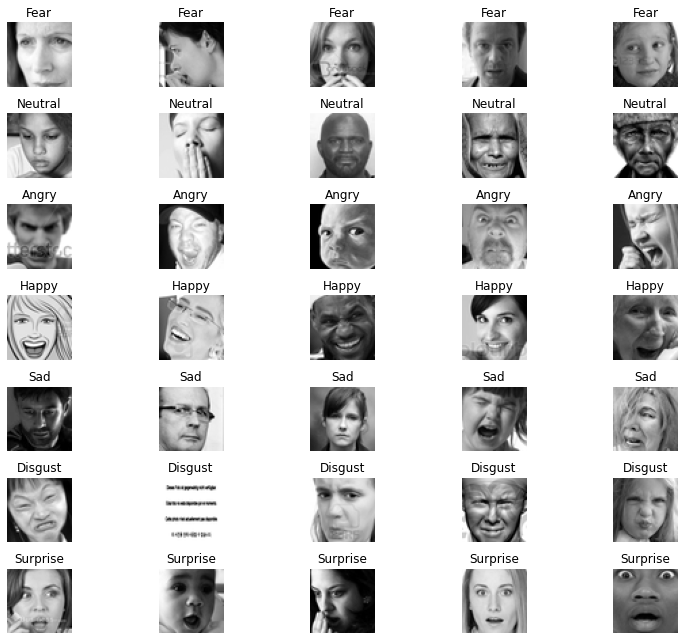

In [14]:
# Select one or a few data samples, and visualize your data in a proper way.
plot_faces(train_data.sample(frac=0.1, replace=True),images_per_row=5, size = 48)

In [15]:
# Perform basic inspection on your data, such as feature types, feature statistics, missing values, etc.
train_data.head()

,pixels,Usage,emotion_type
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral


In [16]:
train_data.describe()

,pixels,Usage,emotion_type
count,28709,28709,28709
unique,27473,1,7
top,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,Training,Happy
freq,11,28709,7215


In [17]:
for ind, val in enumerate(train_data.columns):
  print("Missing vals count for column {}: {}".format(val, train_data[val].isna().sum()))
  # print()

Missing vals count for column pixels: 0
Missing vals count for column Usage: 0
Missing vals count for column emotion_type: 0


In [36]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(train_features, train_labels)


KNeighborsClassifier(n_neighbors=7)

In [37]:
neigh.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
      dtype=object)

In [38]:
neigh.effective_metric_
# neigh.leaf_size

'euclidean'

In [39]:
# Step 4: Run K-nearest-neighbors algorithm using existing functions in sklearn (sklearn.neighbors.KNeighborsClassifier)

# Run the sklearn KNN function (try any K value as you wish) on the validation set , and report the running time during the prediction process.


import time
start = time.time()

y_test_predicted_label = neigh.predict(test_features)
end = time.time()
time_duration = end-start

print("time taken: {} seconds".format(round((time.time() - start),2)))

time taken: 20.83 seconds


In [41]:
# Organize the predicted classes and actual classes into Pandas dataframe, and 
# Calculate the overall accuracy of the predictions.'
import pandas as pd

prediction_summary = pd.DataFrame({'predicted_label':y_test_predicted_label, 'actual_label':test_labels})
prediction_summary


,predicted_label,actual_label
0,Happy,Angry
1,Happy,Disgust
2,Neutral,Sad
3,Happy,Neutral
4,Neutral,Happy
...,...,...
3584,Angry,Sad
3585,Angry,Happy
3586,Sad,Sad
3587,Angry,Sad


In [42]:
correct_predictions = sum(y_test_predicted_label==test_labels)
correct_predictions

accuracy_pred = correct_predictions/len(y_test_predicted_label)
accuracy_pred

0.3232098077458902

In [35]:
# Calculate the per-class accuracy of the predictions. 

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels,y_test_predicted_label)

ind_accuracy=matrix.diagonal()/matrix.sum(axis=1)

for x in range(len(ind_accuracy)):
  print("Accuracy of digit ", x," is: " ,ind_accuracy[x], "(",ind_accuracy[x]*100,"%)")


Accuracy of digit  0  is:  0.3811563169164882 ( 38.11563169164882 %)
Accuracy of digit  1  is:  0.44642857142857145 ( 44.642857142857146 %)
Accuracy of digit  2  is:  0.3487903225806452 ( 34.87903225806452 %)
Accuracy of digit  3  is:  0.41675977653631285 ( 41.675977653631286 %)
Accuracy of digit  4  is:  0.3014827018121911 ( 30.14827018121911 %)
Accuracy of digit  5  is:  0.16845329249617153 ( 16.84532924961715 %)
Accuracy of digit  6  is:  0.42409638554216866 ( 42.40963855421687 %)


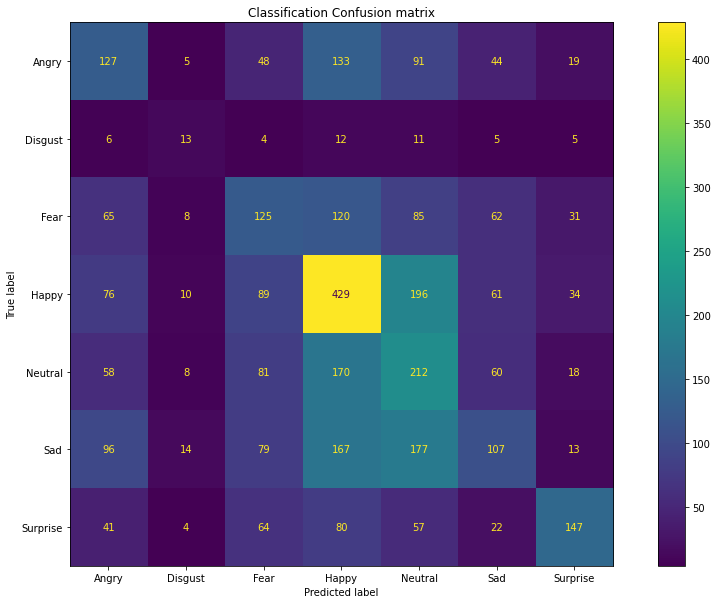

In [49]:
# Let's visualize the classification confusion matrix to check the details of the predictions for each class. 

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(16, 10))
ConfusionMatrixDisplay.from_predictions(test_labels, y_test_predicted_label, ax=ax)
# plt.figure(figsize=(16,16))
plt.title("Classification Confusion matrix")
plt.show()

In [52]:

# Perform 10-fold cross-validation and hyper-parameter tuning on 'train_data' for the KNN model.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from sklearn.metrics import accuracy_score, average_precision_score, precision_score, recall_score, roc_auc_score


#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 5)}

#create new a knn model
estimator = KNeighborsClassifier()
knn_search = GridSearchCV(estimator, param_grid, cv=10)
#knn_search = RandomizedSearchCV(estimator, param_distribs, n_iter=100, verbose=1,n_jobs=1,cv=10, random_state=1)
knn_search.fit(train_features,train_labels)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [53]:
# Select the best model derived from Task E, and retrain the model on the training dataset 'train_data'.
best_model = knn_search.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=1)

In [63]:
# Report the 10-fold cross-validation accuracy on the training dataset 'train_data' for the select model. 
from sklearn.metrics import accuracy_score
best_model.fit(train_features,train_labels)

# Calculate cross-validation accuracy
# print('Cross-validation Accuracy on training set: {:.3f}'.format(cross_val_score(best_model,train_features,train_labels,cv=10).mean()))
print('Accuracy on training set: {:.3f}'
 .format(accuracy_score(train_labels, best_model.predict(train_features))))


Accuracy on training set: 0.998


In [64]:
# Report the accuracy of the test dataset  'publictest_data'  and  'privatetest_data'  for the select model. 
# best_model.fit(validation_features,validation_labels)


print('Accuracy on privatetest_data set: {:.3f}'
 .format(accuracy_score(validation_labels, best_model.predict(validation_features))))


Accuracy on privatetest_data set: 0.405


In [65]:
print('Accuracy on privatetest_data set: {:.3f}'
 .format(accuracy_score(test_labels, best_model.predict(test_features))))


Accuracy on privatetest_data set: 0.402


# Step 5: Write one paragraph to summarize what you have done (including data collection, data loading, model training) and any concerns that you have observed for the later analysis. 

We collected the data of the competition from its source, loaded it into a pandas dataframe then split it into three different parts: training, 
validation and test. We then trained our KNN algorithms (custom and sklearn provided) with the training data and used it to predict labels for the test datasets. There was clearly a low accuracy score for the algorithms overall and across each class, even after 10-fold cross-validation and hyper-parameter tuning, indicating that this is maybe not the best algorithm to be used for this particular dataset or task. Also worthy of note, is that the 10-fold validation suggested 1 as the optimal number of neighbors to compare new nodes with, further indication that KNN may not be the best algorithm for this particular dataset.